In [431]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dropout, Dense,Activation
import datetime

In [432]:
data = pd.read_csv('lotto1.csv')
data.head()

,Date,First,Second,Third,Fourth,Fiveth,Sixth,Bonus,Round
0,2002.12.07,10,23,29,33,37,40,16,1
1,2002.12.14,9,13,21,25,32,42,2,2
2,2002.12.21,11,16,19,21,27,31,30,3
3,2002.12.28,14,27,30,31,40,42,2,4
4,2003.01.04,16,24,29,40,41,42,3,5


In [433]:
avg_num = data['Second'].values

In [434]:
seq_len = 50#최근 50일간의 데이터를 보고 내일 것을 예측한다.
sequence_length = seq_len + 1

result = []
for index in range(len(avg_num) - sequence_length):
    result.append(avg_num[index: index + sequence_length])

In [435]:
normalized_data = []
for window in result:
    normalized_window = [((float(p) / float(window[0])) - 1) for p in window]
    normalized_data.append(normalized_window)

result = np.array(normalized_data)

# split train and test data
row = int(round(result.shape[0] * 0.9))
train = result[:row, :]
np.random.shuffle(train)

x_train = train[:, :-1]
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
y_train = train[:, -1]

x_test = result[row:, :-1]
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
y_test = result[row:, -1]

x_train.shape, x_test.shape

((802, 50, 1), (89, 50, 1))

In [436]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(50, 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(1, activation='linear'))
model.compile(loss='mse', optimizer='rmsprop')
model.summary()

Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_84 (LSTM)               (None, 50, 50)            10400     
_________________________________________________________________
lstm_85 (LSTM)               (None, 64)                29440     
_________________________________________________________________
dense_42 (Dense)             (None, 1)                 65        
Total params: 39,905
Trainable params: 39,905
Non-trainable params: 0
_________________________________________________________________


In [437]:
model.fit(x_train, y_train,
    validation_data=(x_test, y_test),
    batch_size=10,#30개씩묶어서
    epochs=20)#20번 반복학습

Epoch 1/20
81/81 [==============================] - 3s 32ms/step - loss: 1.3565 - val_loss: 1.3135
Epoch 2/20
81/81 [==============================] - 2s 23ms/step - loss: 1.3001 - val_loss: 1.2513
Epoch 3/20
81/81 [==============================] - 2s 28ms/step - loss: 1.2800 - val_loss: 1.6734
Epoch 4/20
81/81 [==============================] - 2s 26ms/step - loss: 1.2624 - val_loss: 1.4649
Epoch 5/20
81/81 [==============================] - 2s 22ms/step - loss: 1.2882 - val_loss: 1.4124
Epoch 6/20
81/81 [==============================] - 2s 21ms/step - loss: 1.2743 - val_loss: 1.1962
Epoch 7/20
81/81 [==============================] - 2s 19ms/step - loss: 1.2617 - val_loss: 1.1010
Epoch 8/20
81/81 [==============================] - 2s 22ms/step - loss: 1.2406 - val_loss: 1.1728
Epoch 9/20
81/81 [==============================] - 3s 40ms/step - loss: 1.2216 - val_loss: 1.3871
Epoch 10/20
81/81 [==============================] - 3s 36ms/step - loss: 1.2133 - val_loss: 1.3620
Epoch 11/

89
[[ 0.        ]
 [-0.30769231]
 [ 0.15384615]
 [ 1.46153846]
 [ 1.        ]
 [-0.07692308]
 [-0.46153846]
 [ 0.61538462]
 [ 0.46153846]
 [ 0.        ]
 [ 0.38461538]
 [ 0.46153846]
 [ 0.15384615]
 [-0.53846154]
 [-0.69230769]
 [-0.61538462]
 [ 1.07692308]
 [ 0.23076923]
 [ 0.84615385]
 [-0.15384615]
 [-0.61538462]
 [-0.38461538]
 [ 0.07692308]
 [ 0.46153846]
 [-0.53846154]
 [ 0.61538462]
 [-0.76923077]
 [-0.15384615]
 [ 0.07692308]
 [-0.76923077]
 [-0.46153846]
 [-0.53846154]
 [ 0.30769231]
 [-0.15384615]
 [ 0.84615385]
 [ 0.23076923]
 [ 0.15384615]
 [-0.69230769]
 [-0.30769231]
 [ 0.61538462]
 [ 0.15384615]
 [-0.53846154]
 [ 1.07692308]
 [-0.76923077]
 [-0.23076923]
 [-0.15384615]
 [-0.23076923]
 [-0.38461538]
 [-0.15384615]
 [ 0.15384615]]
0.07692307692307687
[-0.09779531]


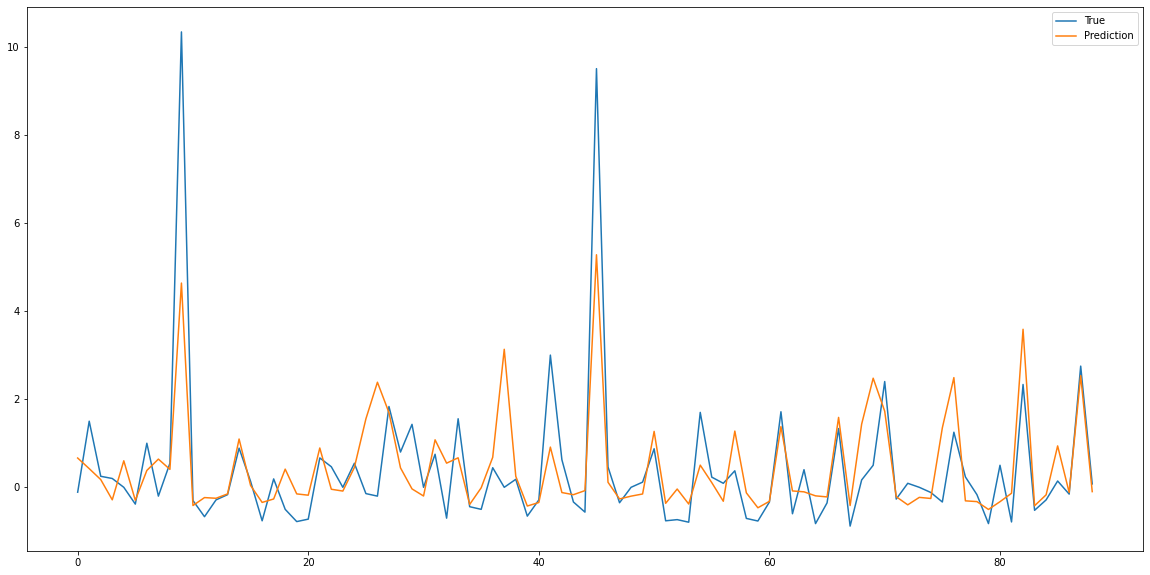

In [438]:
pred = model.predict(x_test)
print(len(x_test))
print(x_test[len(x_test)-1])
print(y_test[len(x_test)-1])
print(pred[len(x_test)-1])

fig = plt.figure(facecolor='white', figsize=(20, 10))
ax = fig.add_subplot(111)
ax.plot(y_test, label='True')
ax.plot(pred, label='Prediction')
ax.legend()
plt.show()